In [1]:
include("../src/Jacobi.jl")

Jacobi

In [2]:
#fun(x,k=1) = cos(k*x) + 1
#ifun(x,k=1) = x + sin(k*x) / k
fun(x) = cos(x)
ifun(x) = -x.*sin(x) + sin(x) - cos(x)
dfun(x) = -sin(x)

dfun (generic function with 1 method)

In [3]:
function calc_integr{T<:Number, QT<:Jacobi.QUADRATURE_TYPE}(Q, a, b, ::Type{QT}=Jacobi.GLJ, ::Type{T}=Float64)
    
    z = Jacobi.qzeros(QT, Q, a, b, T)
    w = Jacobi.qweights(QT, z, a, b)
    
    y = fun(z)
    
    return sum(w .* y)
end

calc_integr(50, 1, 0, Jacobi.GLJ, BigFloat)

1.682941969615793013305004643260597999245126121596742131345503419983820808782497

In [4]:
set_bigfloat_precision(1024)

Iex{T<:Number}(::Type{T}=Float64) = ifun(one(T)) - ifun(-one(T))
Iex(BigFloat)

1.682941969615793013305004643260597999245126121596742131345503419983820808782479337897279487086105391708698075815841348586518237841983797762386820655458424818961583911653533213999815528023956817565465132694969605740597312314035924910789787145849340254172972562106764061122754436407736899335523348532478026765491

In [5]:
Q = 2:40
tipo =BigFloat
Ie = Iex(tipo)
QT = Jacobi.GRJP
a = 1
b = 0
err = [abs(calc_integr(q, a, b, QT, tipo) - Ie) for q in Q];

In [6]:
using PyPlot

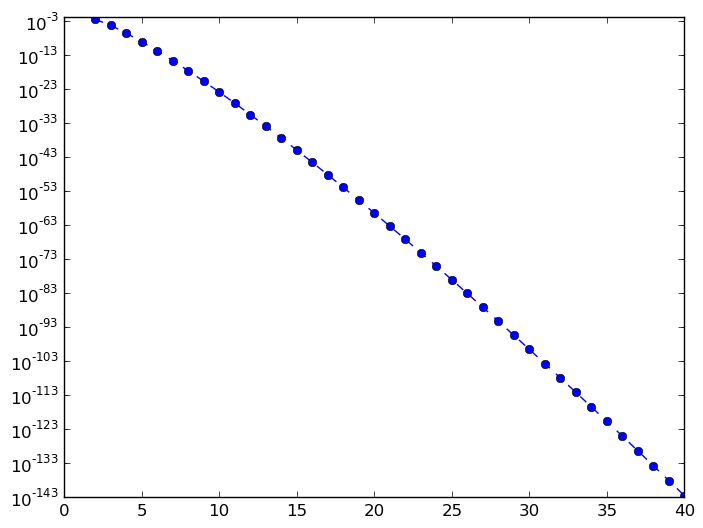

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f784acc7c50>

In [7]:
semilogy(Q, err, "o--")

In [8]:
function calc_deriv_err{T<:Number, QT<:Jacobi.QUADRATURE_TYPE}(Q, ::Type{QT}=Jacobi.GLJ, ::Type{T}=Float64)
    
    z = Jacobi.qzeros(QT, Q, 0, 0, T)
    w = Jacobi.qweights(QT, z, 0, 0)
    D = Jacobi.qdiff(QT, z)
    
    y = fun(z)
    yex = dfun(z)
    return maxabs(D * y - yex)
end


calc_deriv_err (generic function with 3 methods)

In [9]:
Q = 2:40
tipo =BigFloat
QT = Jacobi.GLJ
derr = [calc_deriv_err(q, QT, tipo)  for q in Q];

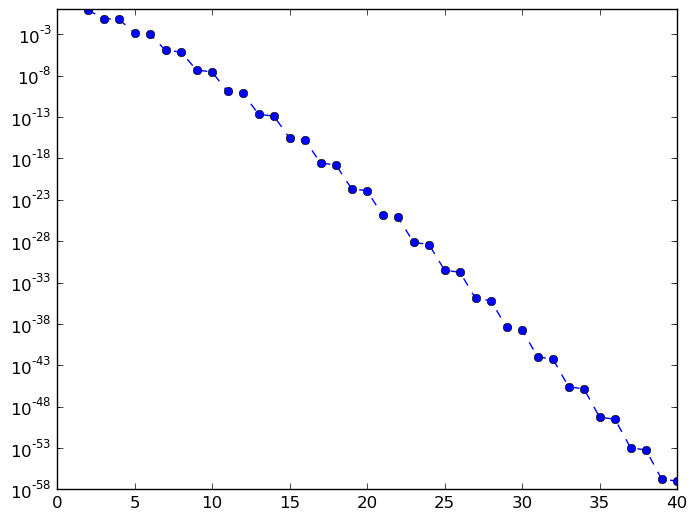

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f784aaf2e50>

In [10]:
semilogy(Q, derr, "o--")